In [1]:
#Bibliotecas que precisam ser instaladas para a prática:
!pip install unidecode==1.2.0
!pip install wikipedia==1.4.0
!pip install spacy==2.2.4
!python -m spacy download en
!python -m spacy download pt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 241 kB 5.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=542aa83164770950fa7ac311da66666e2064311c55b9fabfd527178b73ec831d
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.6 MB 5.1 MB/s 
     |████████████████████████████████| 2.2 MB 44.6 MB/s 
     |████████████████████████████████| 3.7 MB 58.0 MB/s 
     |████████████████████████████████| 184 kB 69.9 MB/s 
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.4
    Uninstalling srsly-2.4.4:
      Successfull

# Expressões Regulares

- O Pacote que permite utilizar ER é <b>re</b>
- Existem vários métodos para utilizar expressões regulares em python., alguns deles para <b>buscar</b> padrões são:

|   Método   |                                      Descrição                                     |
|:----------:|:----------------------------------------------------------------------------------:|
| match()    | Determina se a RE combina com o início da string.                                  |
| search()   | Varre toda a string, procurando qualquer local onde esta RE tem correspondência.   |
| findall()  | Encontra todas as substrings onde a RE corresponde, e as retorna como uma lista.   |
| finditer() | Encontra todas as substrings onde a RE corresponde, e as retorna como um iterador. |

- Métodos para modificar strings:

| Método  | Descrição                                                                                            |
|---------|------------------------------------------------------------------------------------------------------|
| split() | Divide a string em uma lista, dividindo-a onde quer que haja correspondência com a RE                |
| sub()   | Encontra todas as substrings que correspondem com a RE e faz a substituição por uma string diferente |
| subn()  |  É o mesmo que o método sub(), mas retorna a nova string e o número de substituições                 |


Link: https://docs.python.org/pt-br/3.8/howto/regex.html

Agora vamos exemplificar cada um desses métodos:

In [69]:
import re

In [3]:
texto = "Vamos encontrar Padrões nesta string!! \nAgora é a nossa primeira prática de NLP!! Vamos aprender a procurar padrões!! \nBelo Horizonte, 2000-12-01."

In [4]:
print(texto)

Vamos encontrar Padrões nesta string!! 
Agora é a nossa primeira prática de NLP!! Vamos aprender a procurar padrões!! 
Belo Horizonte, 2000-12-01.


## Match
Determina se a RE combina com o início da string

In [5]:
re.match("Vamos", texto)

<re.Match object; span=(0, 5), match='Vamos'>

In [6]:
re.match("nesta", texto)

é case sensitive

In [7]:
re.match(r"vamos", texto)

## Search
Varre toda a string, procurando qualquer local onde esta RE tem correspondência

In [8]:
re.search("Vamos", texto)

<re.Match object; span=(0, 5), match='Vamos'>

In [9]:
re.search("encontrar", texto)

<re.Match object; span=(6, 15), match='encontrar'>

o default é case-sensitive

In [10]:
re.search("padrões", texto)

<re.Match object; span=(108, 115), match='padrões'>

In [11]:
re.search("Padrões", texto)

<re.Match object; span=(16, 23), match='Padrões'>

podemos ignorar case-sensitive

In [12]:
re.search("padrões", texto, re.IGNORECASE)

<re.Match object; span=(16, 23), match='Padrões'>

## Findall
Encontra todas as substrings onde a RE corresponde, e as retorna como uma lista

In [13]:
re.findall("Vamos", texto)

['Vamos', 'Vamos']

In [14]:
re.findall("padrões", texto)

['padrões']

re.I é igal re.IGNORECASE

In [15]:
re.findall("padrões", texto, re.I)

['Padrões', 'padrões']

In [16]:
#quando uso o + o padrão é 1 ou mais. Assim todas string que tem a no meio de outras letras  são retornadas
re.findall(r'\w+a\w+', texto)

['Vamos', 'encontrar', 'Padrões', 'Vamos', 'procurar', 'padrões']

In [17]:
#quando uso o * o padrão é 0 ou mais. Assim todas string que tem a no meio, ou no início ou no fim são retornadas
re.findall(r'\w*a\w*', texto)

['Vamos',
 'encontrar',
 'Padrões',
 'nesta',
 'Agora',
 'a',
 'nossa',
 'primeira',
 'prática',
 'Vamos',
 'aprender',
 'a',
 'procurar',
 'padrões']

## Finditer
Encontra todas as substrings onde a RE corresponde, e as retorna como um iterador.

In [18]:
re.finditer("Vamos", texto)

In [19]:
res = re.finditer("Vamos", texto)
[r for r in res]

[<re.Match object; span=(0, 5), match='Vamos'>,
 <re.Match object; span=(82, 87), match='Vamos'>]

In [20]:
re.finditer("padrões", texto)

In [21]:
re.finditer("padrões", texto, re.I)

## Split

In [22]:
re.split('\n',texto)

['Vamos encontrar Padrões nesta string!! ',
 'Agora é a nossa primeira prática de NLP!! Vamos aprender a procurar padrões!! ',
 'Belo Horizonte, 2000-12-01.']

In [23]:
type(texto)

str

In [24]:
texto.split("\s+")

['Vamos encontrar Padrões nesta string!! \nAgora é a nossa primeira prática de NLP!! Vamos aprender a procurar padrões!! \nBelo Horizonte, 2000-12-01.']

In [25]:
(re.split(r'\s+',texto))

['Vamos',
 'encontrar',
 'Padrões',
 'nesta',
 'string!!',
 'Agora',
 'é',
 'a',
 'nossa',
 'primeira',
 'prática',
 'de',
 'NLP!!',
 'Vamos',
 'aprender',
 'a',
 'procurar',
 'padrões!!',
 'Belo',
 'Horizonte,',
 '2000-12-01.']

## Sub

In [26]:
re.sub('\w+a\w+', 'a-word', texto)

'a-word a-word a-word nesta string!! \nAgora é a nossa primeira prática de NLP!! a-word aprender a a-word a-word!! \nBelo Horizonte, 2000-12-01.'

## Subn

In [27]:
re.subn('\w+a\w+', 'a-word', texto)

('a-word a-word a-word nesta string!! \nAgora é a nossa primeira prática de NLP!! a-word aprender a a-word a-word!! \nBelo Horizonte, 2000-12-01.',
 6)

## Exercícios

1. Escreva uma expressão regular para verificar se uma string contém apenas um determinado conjunto de caracteres (neste caso, a-z, A-Z e 0-9).

In [44]:
regexPattern = "^[A-Za-z0-9]+$"
string1 = "ABCDEFabcdef123450"
string2 = "*&%@#!}{"

r1 = re.match(regexPattern, string1)
r2 = re.match(regexPattern, string2)

print(f'{string1}:\t{r1} \n{string2}:\t\t{r2}')

ABCDEFabcdef123450:	<re.Match object; span=(0, 18), match='ABCDEFabcdef123450'> 
*&%@#!}{:		None


2. Escreva um expressão regular que corresponda a uma sequência que tenha um a seguido por um ou mais b's.

In [46]:
regexPattern = "a(?=b)+"
string1 = "abc"
string2 = "aacb"
string3 = "abbc"
string4 = "bb"

r1 = re.match(regexPattern, string1)
r2 = re.match(regexPattern, string2)
r3 = re.match(regexPattern, string3)
r4 = re.match(regexPattern, string4)

print(f'{string1}:\t{r1} \n{string2}:\t\t{r2}')
print(f'{string3}:\t{r3} \n{string4}:\t\t{r4}')

abc:	<re.Match object; span=(0, 1), match='a'> 
aacb:		None
abbc:	<re.Match object; span=(0, 1), match='a'> 
bb:		None


3. Escreva uma expressão para dividir uma string em letras maiúsculas

In [56]:
#regexPattern = "(?=[A-Z][^A-Z])"
regexPattern = "(?=[A-Z]+)"
string = "ExercídiosExpressãoRegularAA"

re.split(regexPattern,string)

['', 'Exercídios', 'Expressão', 'Regular', 'A', 'A']

4. Escreva uma expressão regular para remover a área de parênteses em uma string


- Amostra de Entrada: 
> * ["example (.br)", "w3resource", "github (.com)", "stackoverflow (.com)"] </br>
* Saída Esperada: 
> * example
> * w3resource
> * github
> * stackoverflow

In [72]:
strings = ["example (.br)", "w3resource", "github (.com)", "stackoverflow (.??)"]
regexPattern = "\s\(\..+\)"

for r in strings:
  print(re.sub(regexPattern, "", r))


example
w3resource
github
stackoverflow


5. Recupere todos os "Twitter" da string abaixo

In [74]:
texto_exemplo_twitter = """This is a @test of some cool features that @mi_asd be @use-ful but @don't. look at this email@address.com. @bla! I like #nylas but I don't like to go to this apple.com?a#url. I also don't like the ### comment blocks. But #msft is cool."""
texto_exemplo_twitter

"This is a @test of some cool features that @mi_asd be @use-ful but @don't. look at this email@address.com. @bla! I like #nylas but I don't like to go to this apple.com?a#url. I also don't like the ### comment blocks. But #msft is cool."

In [102]:
regexPattern = "\s\@([A-Za-z]+[A-Za-z0-9-_\']+)"
pattern = re.compile(regexPattern)

pattern.findall(texto_exemplo_twitter)

['test', 'mi_asd', 'use-ful', "don't", 'bla']

6. Escreva uma expressão regular para remover as urls do texto:

- Para realizar pesquisas de artigos acadêmicos use o Google Scholar: https://scholar.google.com.br/
- Sempre mantenha seu linkedin atualizado: https://www.linkedin.com/ 

In [110]:
texto1 = "Para realizar pesquisas de artigos acadêmicos use o Google Scholar: https://scholar.google.com.br/"
texto2 = "Sempre mantenha seu linkedin atualizado: https://www.linkedin.com/"

textList = [texto1, texto2]

regexPattern = "(http)?(s*\:\/\/.*\/)"
pattern = re.compile(regexPattern)

[print(pattern.sub("", txt)) for txt in textList]
  

Para realizar pesquisas de artigos acadêmicos use o Google Scholar: 
Sempre mantenha seu linkedin atualizado: 


[None, None]

# Pré-processamento

In [111]:
import nltk
import wikipedia
import re
import spacy
from nltk.probability import FreqDist
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('rslp')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

## Definindo o corpus

Primeiramente, definimos o corpus que iremos trabalhar.

In [112]:
# Caso o pacote wikipedia não funcione:
## Entre no link e faça downaload do arquivo https://drive.google.com/open?id=15R1jcugeM5SoGSPIPyG_6X6F3oMlxSBt
## Depois leia com o comando abaixo
#file = open("pln_wikipedia.txt", 'r')
#file_wiki = file.readlines()
#file.close()
#corpus = '\n'.join(file_wiki)

In [114]:
from urllib.request import urlopen

url = " https://drive.google.com/open?id=15R1jcugeM5SoGSPIPyG_6X6F3oMlxSBt"

# Download from URL
with urlopen(url) as file:
    file = file.read().decode()

#print(content)

In [115]:
wikipedia.set_lang("pt")

In [116]:
pln = wikipedia.page("PLN")

In [117]:
corpus = pln.content

In [118]:
print(corpus)

Processamento de língua natural (PLN) é uma subárea da ciência da computação, inteligência artificial e da linguística que estuda os problemas da geração e compreensão automática de línguas humanas naturais. Sistemas de geração de língua natural convertem informação de bancos de dados de computadores em linguagem compreensível ao ser humano e sistemas de compreensão de língua natural convertem ocorrências de linguagem humana em representações mais formais, mais facilmente manipuláveis por programas de computador. Alguns desafios do PLN são compreensão de língua natural, fazer com que computadores extraiam sentido de linguagem humana ou natural e geração de língua natural.


== História ==
A história do PLN começou na década de 1950, quando Alan Turing publicou o artigo "Computing Machinery and Intelligence", que propunha o que agora é chamado de teste de Turing como critério de inteligência.
Em 1954, a experiência de Georgetown envolveu a tradução automática de mais de sessenta frases 

In [119]:
print("O texto que estamos utilizando é da URL",pln.url)

O texto que estamos utilizando é da URL https://pt.wikipedia.org/wiki/Processamento_de_linguagem_natural


In [120]:
print(pln.content)

Processamento de língua natural (PLN) é uma subárea da ciência da computação, inteligência artificial e da linguística que estuda os problemas da geração e compreensão automática de línguas humanas naturais. Sistemas de geração de língua natural convertem informação de bancos de dados de computadores em linguagem compreensível ao ser humano e sistemas de compreensão de língua natural convertem ocorrências de linguagem humana em representações mais formais, mais facilmente manipuláveis por programas de computador. Alguns desafios do PLN são compreensão de língua natural, fazer com que computadores extraiam sentido de linguagem humana ou natural e geração de língua natural.


== História ==
A história do PLN começou na década de 1950, quando Alan Turing publicou o artigo "Computing Machinery and Intelligence", que propunha o que agora é chamado de teste de Turing como critério de inteligência.
Em 1954, a experiência de Georgetown envolveu a tradução automática de mais de sessenta frases 

## Tokenização

Existem várias formas de realizar tokenização. 
1. Split()
2. Regex
3. NLTK
4. ...

### Split

1. Faça utilizando o método abaixo
<b> Não esqueça de armazenar o resultado na variável abaixo. </b>

```python
str.split()
```

In [123]:
tokens_split = corpus.split(" ")

In [124]:
#problema do split é que ele não separa as pontuações.
print(len(tokens_split))
print(tokens_split)

4071
['Processamento', 'de', 'língua', 'natural', '(PLN)', 'é', 'uma', 'subárea', 'da', 'ciência', 'da', 'computação,', 'inteligência', 'artificial', 'e', 'da', 'linguística', 'que', 'estuda', 'os', 'problemas', 'da', 'geração', 'e', 'compreensão', 'automática', 'de', 'línguas', 'humanas', 'naturais.', 'Sistemas', 'de', 'geração', 'de', 'língua', 'natural', 'convertem', 'informação', 'de', 'bancos', 'de', 'dados', 'de', 'computadores', 'em', 'linguagem', 'compreensível', 'ao', 'ser', 'humano', 'e', 'sistemas', 'de', 'compreensão', 'de', 'língua', 'natural', 'convertem', 'ocorrências', 'de', 'linguagem', 'humana', 'em', 'representações', 'mais', 'formais,', 'mais', 'facilmente', 'manipuláveis', 'por', 'programas', 'de', 'computador.', 'Alguns', 'desafios', 'do', 'PLN', 'são', 'compreensão', 'de', 'língua', 'natural,', 'fazer', 'com', 'que', 'computadores', 'extraiam', 'sentido', 'de', 'linguagem', 'humana', 'ou', 'natural', 'e', 'geração', 'de', 'língua', 'natural.\n\n\n==', 'História',

### Regex

2. Faça utilizando o método abaixo
<b> Não esqueça de armazenar o resultado na variável abaixo. </b>

```python
re.findall(r"\w+(?:'\w+)?|[^\w\s]", corpus)
```

In [125]:
tokens_regex = re.findall(r"\w+(?:'\w+)?|[^\w\s]", corpus)

In [126]:
#Regex
print(len(tokens_regex))
print(tokens_regex)

4954
['Processamento', 'de', 'língua', 'natural', '(', 'PLN', ')', 'é', 'uma', 'subárea', 'da', 'ciência', 'da', 'computação', ',', 'inteligência', 'artificial', 'e', 'da', 'linguística', 'que', 'estuda', 'os', 'problemas', 'da', 'geração', 'e', 'compreensão', 'automática', 'de', 'línguas', 'humanas', 'naturais', '.', 'Sistemas', 'de', 'geração', 'de', 'língua', 'natural', 'convertem', 'informação', 'de', 'bancos', 'de', 'dados', 'de', 'computadores', 'em', 'linguagem', 'compreensível', 'ao', 'ser', 'humano', 'e', 'sistemas', 'de', 'compreensão', 'de', 'língua', 'natural', 'convertem', 'ocorrências', 'de', 'linguagem', 'humana', 'em', 'representações', 'mais', 'formais', ',', 'mais', 'facilmente', 'manipuláveis', 'por', 'programas', 'de', 'computador', '.', 'Alguns', 'desafios', 'do', 'PLN', 'são', 'compreensão', 'de', 'língua', 'natural', ',', 'fazer', 'com', 'que', 'computadores', 'extraiam', 'sentido', 'de', 'linguagem', 'humana', 'ou', 'natural', 'e', 'geração', 'de', 'língua', 'na

### NLTK

3. Faça utilizando o método abaixo.
<b> Não esqueça de armazenar o resultado na variável abaixo. </b>

```python
nltk.word_tokenize(corpus, language='portuguese')
```

In [127]:
tokens_nltk = nltk.word_tokenize(corpus, language='portuguese')

In [128]:
#Regex
print(len(tokens_nltk))
print(tokens_nltk)

4789
['Processamento', 'de', 'língua', 'natural', '(', 'PLN', ')', 'é', 'uma', 'subárea', 'da', 'ciência', 'da', 'computação', ',', 'inteligência', 'artificial', 'e', 'da', 'linguística', 'que', 'estuda', 'os', 'problemas', 'da', 'geração', 'e', 'compreensão', 'automática', 'de', 'línguas', 'humanas', 'naturais', '.', 'Sistemas', 'de', 'geração', 'de', 'língua', 'natural', 'convertem', 'informação', 'de', 'bancos', 'de', 'dados', 'de', 'computadores', 'em', 'linguagem', 'compreensível', 'ao', 'ser', 'humano', 'e', 'sistemas', 'de', 'compreensão', 'de', 'língua', 'natural', 'convertem', 'ocorrências', 'de', 'linguagem', 'humana', 'em', 'representações', 'mais', 'formais', ',', 'mais', 'facilmente', 'manipuláveis', 'por', 'programas', 'de', 'computador', '.', 'Alguns', 'desafios', 'do', 'PLN', 'são', 'compreensão', 'de', 'língua', 'natural', ',', 'fazer', 'com', 'que', 'computadores', 'extraiam', 'sentido', 'de', 'linguagem', 'humana', 'ou', 'natural', 'e', 'geração', 'de', 'língua', 'na

In [129]:
def plot_frequencia_tokens(tokens):
    fd_words = FreqDist(tokens)
    fd_words.plot(20)

### Plot das tokenizações

4. Plote o resultado de cada uma das tokenizações. 
Utilize o método <b> plot_frequencia_tokens() </b> para plotar o gráfico.
Também imprima o tamanho de cada tokenização

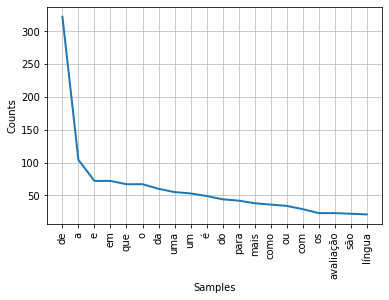

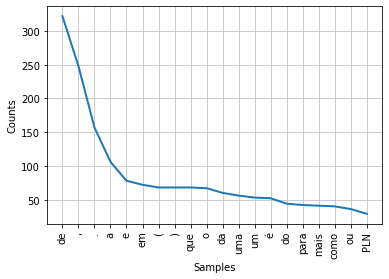

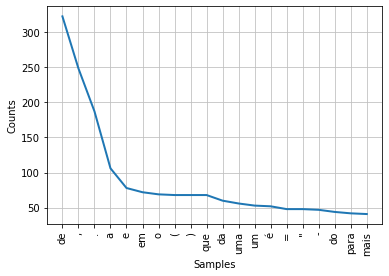

In [139]:

plot_frequencia_tokens(tokens_split)
plot_frequencia_tokens(tokens_nltk)
plot_frequencia_tokens(tokens_regex)

Como foi possível observar, existem variações nas tokenizações realizadas. 
A que gerou mais tokens foi a que utilizou regex.
Por isso iremos utilizá-la a partir deste ponto.
Utilize o resultado de <b> tokens_regex</b>.

## Capitalização

5. Traforme todos os tokens para minúsculo utilizando a função abaixo:

```python
str.lower()
```

In [141]:
tokens =  [tkn.lower() for tkn in tokens_regex]

 <b> <span style="color:red"> Lembre de utilizar a VARIÁVEL que contém o resultado da transformação anterior </span> </b>

## Remoção Stopwords

6. remova todas as stopwords retornadas pelo pacote NLTK da lista de tokens.

```python
portugues_stops = stopwords.words('portuguese')
```

Note que a variável "portugues_stops" é uma lista de palavras.

In [143]:
from nltk.corpus import stopwords

In [144]:
portugues_stops = stopwords.words('portuguese')

In [145]:
tokens_sem_stop = [tkn for tkn in tokens if tkn not in portugues_stops]

## Remoção Números

7. remova todos os números, utilizando uma regex

```python
re.sub(__,__,__)
```

In [147]:
tokens_sem_numbers = [re.sub("\d","",tkn) for tkn in tokens_sem_stop]


## Remoção Pontuação

8. remova todas as pontruações retornadas pelo pacote string da lista de tokens.

```python
string.punctuation
```

In [149]:
import string

In [150]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [178]:
#regexPattern = "[\!\"\#\$\%\&\\\'\(\)\*\+\,\-\.\/\:\;\<\=\>\?\@\[\\\]\^\_\`\{\|\}\~]"
tokens_sem_punction = [re.sub(r'[^\w]' ,"",tkn) for tkn in tokens_sem_numbers]


## Remoção Acentos

9. remova todos os acentos utilizando a função abaixo:

```python
unidecode(str)
```

In [179]:
from unidecode import unidecode

In [193]:
tokens_sem_acentos = [unidecode(tkn) for tkn in tokens_sem_punction if tkn != '']

10. Plote a frequência dos tokens sem acentos. Utilize o método plot_frequencia_tokens() para plotar o gráfico. Também imprima o tamanho desta lista. 

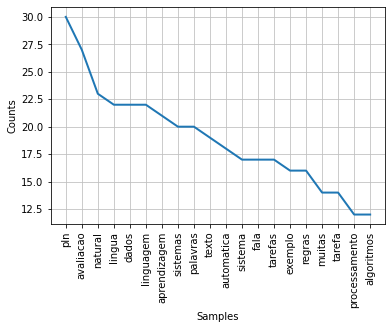

Tmanho da lista de tokens_sem_acentos: 2500


In [194]:
plot_frequencia_tokens(tokens_sem_acentos)
print(f'Tmanho da lista de tokens_sem_acentos: {len(tokens_sem_acentos)}')

## Stemming

Iremos utilizar o stemming da biblioteca NLTK. O algoritmo disponível para este procedimento em portugês é o RSLPStemmer.

```python
stemmer = nltk.stem.RSLPStemmer()
```

11. Aplique o stemmer em cada elemento da lista de tokens.


In [195]:
stemmer = nltk.stem.RSLPStemmer()

In [197]:
tokens_stemmer = [stemmer.stem(tkn) for tkn in tokens_sem_acentos]

12.  Plote a frequência dos tokens após o processo de stemming. Utilize o método plot_frequencia_tokens() para plotar o gráfico. Também imprima o tamanho desta lista. 

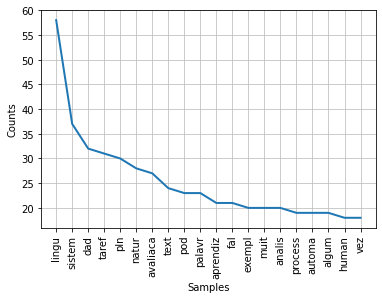

Tmanho da lista de tokens_stemmer: 2500


In [198]:
plot_frequencia_tokens(tokens_stemmer)
print(f'Tmanho da lista de tokens_stemmer: {len(tokens_stemmer)}')

## Lemmatization
13. Aplique a lematização
a biblitoteca NLTK não possui lematização para português.
Mas a scpaCy possui.

In [199]:
import pt_core_news_sm

In [200]:
#carrega o modelo para português
nlp = pt_core_news_sm.load()

A primeira etapa para executar a lematização é transformar a lista de tokens para uma string. 
Utilize a variável de tokens: <b> tokens_sem_punction </b>.
Você pode executar a <b> lematização </b> com acentos ou sem acentos. Funciona da mesma forma.

Dica: utilize o método join para isto:

```python
str.join(list)

```

In [201]:
str_tokens = ' '.join(tokens_sem_punction)
#str_tokens = ' '.join(tokens_sem_acentos)

Depois carregue a string de tokens (<b>str_tokens</b>) no modelo <b> nlp </b>, carregado em um dos passos anteriores.

```python
doc = nlp(str_tokens)
```

In [202]:
doc = nlp(str_tokens)

Verifique o tipo da variável <b> doc </b>.
Observe que é do tipo spacy.tokens.doc.Doc

In [203]:
type(doc)

spacy.tokens.doc.Doc

Como tipo da variável doc é do tipo spacy.tokens.doc.Doc.
Apenas é preciso iterar em cada token e retornar o atributo <b> lemma_</b>

In [204]:
token_lemm = [token.lemma_ for token in doc]

In [205]:
len(token_lemm)

3094

14.  Plote a frequência dos tokens após o processo de lematização. Utilize o método plot_frequencia_tokens() para plotar o gráfico. Também imprima o tamanho desta lista. 

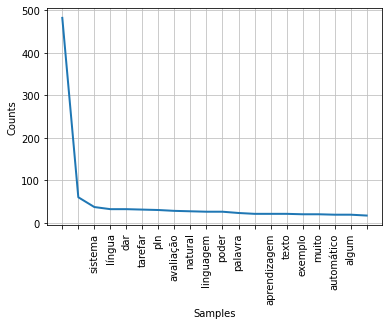

In [206]:
plot_frequencia_tokens(token_lemm)

# Extra: Outras bibliotecas para pré-processamento

## Texhero

https://texthero.org/

In [207]:
!pip install texthero==1.0.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [208]:
import texthero as hero
import pandas as pd

In [209]:
texto = \
"""A história      do PLN (Processamento de linguagem Natural) começou na década de 1950, quando Alan Turing publicou o artigo Computing Machinery and Intelligence. 
Fonte: https://pt.wikipedia.org/wiki/Processamento_de_linguagem_natural """

In [210]:
texto

'A história      do PLN (Processamento de linguagem Natural) começou na década de 1950, quando Alan Turing publicou o artigo Computing Machinery and Intelligence. \nFonte: https://pt.wikipedia.org/wiki/Processamento_de_linguagem_natural '

In [211]:
texto = pd.Series(texto)

In [212]:
#Aplica tokenização
hero.tokenize(texto).values[0]

/usr/local/lib/python3.7/dist-packages/texthero/preprocessing.py:598: FutureWarning: The default value of regex will change from True to False in a future version.
  return s.str.replace(pattern, r"\2 \3 \4 \5").str.split()


['A',
 'história',
 'do',
 'PLN',
 '(',
 'Processamento',
 'de',
 'linguagem',
 'Natural',
 ')',
 'começou',
 'na',
 'década',
 'de',
 '1950',
 ',',
 'quando',
 'Alan',
 'Turing',
 'publicou',
 'o',
 'artigo',
 'Computing',
 'Machinery',
 'and',
 'Intelligence',
 '.',
 'Fonte',
 ':',
 'https',
 ':',
 '/',
 '/',
 'pt.wikipedia.org/wiki/Processamento',
 '_',
 'de',
 '_',
 'linguagem',
 '_',
 'natural']

In [213]:
#Remove numeros
hero.remove_digits(texto).values[0]

/usr/local/lib/python3.7/dist-packages/texthero/preprocessing.py:72: FutureWarning: The default value of regex will change from True to False in a future version.
  return input.str.replace(pattern, symbols)


'A história      do PLN (Processamento de linguagem Natural) começou na década de  , quando Alan Turing publicou o artigo Computing Machinery and Intelligence. \nFonte: https://pt.wikipedia.org/wiki/Processamento_de_linguagem_natural '

In [214]:
#Remove pontuação
hero.remove_punctuation(texto).values[0]

/usr/local/lib/python3.7/dist-packages/texthero/preprocessing.py:131: FutureWarning: The default value of regex will change from True to False in a future version.
  return input.str.replace(rf"([{string.punctuation}])+", symbol)


'A história      do PLN  Processamento de linguagem Natural  começou na década de 1950  quando Alan Turing publicou o artigo Computing Machinery and Intelligence  \nFonte  https pt wikipedia org wiki Processamento de linguagem natural '

In [215]:
#Remove parênteses
hero.remove_brackets(texto).values[0]

/usr/local/lib/python3.7/dist-packages/texthero/preprocessing.py:447: FutureWarning: The default value of regex will change from True to False in a future version.
  return s.str.replace(r"\([^()]*\)", "")
/usr/local/lib/python3.7/dist-packages/texthero/preprocessing.py:469: FutureWarning: The default value of regex will change from True to False in a future version.
  return s.str.replace(r"\{[^{}]*\}", "")
/usr/local/lib/python3.7/dist-packages/texthero/preprocessing.py:493: FutureWarning: The default value of regex will change from True to False in a future version.
  return s.str.replace(r"\[[^\[\]]*\]", "")
/usr/local/lib/python3.7/dist-packages/texthero/preprocessing.py:516: FutureWarning: The default value of regex will change from True to False in a future version.
  return s.str.replace(r"<[^<>]*>", "")


'A história      do PLN  começou na década de 1950, quando Alan Turing publicou o artigo Computing Machinery and Intelligence. \nFonte: https://pt.wikipedia.org/wiki/Processamento_de_linguagem_natural '

In [216]:
#Remove espaços em brancos
hero.remove_whitespace(texto).values[0]

'A história do PLN (Processamento de linguagem Natural) começou na década de 1950, quando Alan Turing publicou o artigo Computing Machinery and Intelligence. Fonte: https://pt.wikipedia.org/wiki/Processamento_de_linguagem_natural'

In [217]:
#Remove stopwords
portugues_stops = stopwords.words('portuguese')
hero.remove_stopwords(texto, portugues_stops).values[0]

'A história       PLN (Processamento  linguagem Natural) começou  década  1950,  Alan Turing publicou  artigo Computing Machinery and Intelligence. \nFonte: https://pt.wikipedia.org/wiki/Processamento_de_linguagem_natural '

In [218]:
#Remove URL
hero.remove_urls(texto).values[0]

/usr/local/lib/python3.7/dist-packages/texthero/preprocessing.py:664: FutureWarning: The default value of regex will change from True to False in a future version.
  return s.str.replace(pattern, symbol)


'A história      do PLN (Processamento de linguagem Natural) começou na década de 1950, quando Alan Turing publicou o artigo Computing Machinery and Intelligence. \nFonte:   '

## Clean-Text

https://github.com/jfilter/clean-text

In [235]:
!python --version

Python 3.7.13


In [1]:
!pip install clean-text==0.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from cleantext import clean

In [3]:
texto = \
"""A história      do PLN (Processamento de linguagem Natural) começou na década de 1950, quando Alan Turing publicou o artigo Computing Machinery and Intelligence. 
Fonte: https://pt.wikipedia.org/wiki/Processamento_de_linguagem_natural """

In [4]:
clean(texto,
    fix_unicode=True,              
    to_ascii=True,                 
    lower=True,                    
    no_line_breaks=False,
    no_urls=True,
    no_emails=False,     
    no_phone_numbers=False,
    no_numbers=True,      
    no_digits=True,       
    no_currency_symbols=False, 
    no_punct=True,          
    replace_with_punct="",
    replace_with_url="url.com",
    replace_with_email="mail.com",
    replace_with_phone_number="021999",
    replace_with_number="021",
    replace_with_digit="0",
    replace_with_currency_symbol="BR",
    lang="pt"
)

'a historia do pln processamento de linguagem natural comecou na decada de 000 quando alan turing publicou o artigo computing machinery and intelligence\nfonte urlcom'